In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
filename = 'FigS8_data.xlsx'
xl = pd.ExcelFile(filename)
raw_od = xl.parse('figS8', index_col = None, header = None, skiprows = 37).iloc[:60,:173]

In [3]:
time = xl.parse('figS8', index_col = None, header = None, skiprows = 35).iloc[0,1:173]
time = time/3600
time

1            0.0
2       0.166667
3       0.333333
4            0.5
5       0.666667
         ...    
168    27.833583
169     28.00025
170    28.166917
171    28.333583
172     28.50025
Name: 0, Length: 172, dtype: object

In [4]:
# transform to long form
temp_header = time.copy()
time_header = pd.concat([pd.Series(['wellID']), temp_header])

od = raw_od.copy()
od.columns = time_header

strainID = np.tile(np.array(['naive TOP10F', '16,16,32', '10,16,32', '8,16,32', '16,10,32', '8,10,32', 
                             '16,8,32','10,8,32', '8,8,32', '16,16,34']),6)
replicateID =np.repeat( np.array([1,2,3,4,5,6]),10)

od.insert(1, 'strain', strainID)
od.insert(1, 'replicate', replicateID)

od_long = pd.melt(od, id_vars = ['wellID','strain','replicate'], value_name = 'OD600')
od_long.rename(columns = {'variable':'time'}, inplace = True)
od_long.OD600 = od_long.OD600.astype(float)
od_long.time = od_long.time.astype(float)

od_long.head()

,wellID,strain,replicate,time,OD600
0,B2,naive TOP10F,1,0.0,0.0558
1,B3,"16,16,32",1,0.0,0.0570
2,B4,"10,16,32",1,0.0,0.0539
3,B5,"8,16,32",1,0.0,0.0540
4,B6,"16,10,32",1,0.0,0.0543


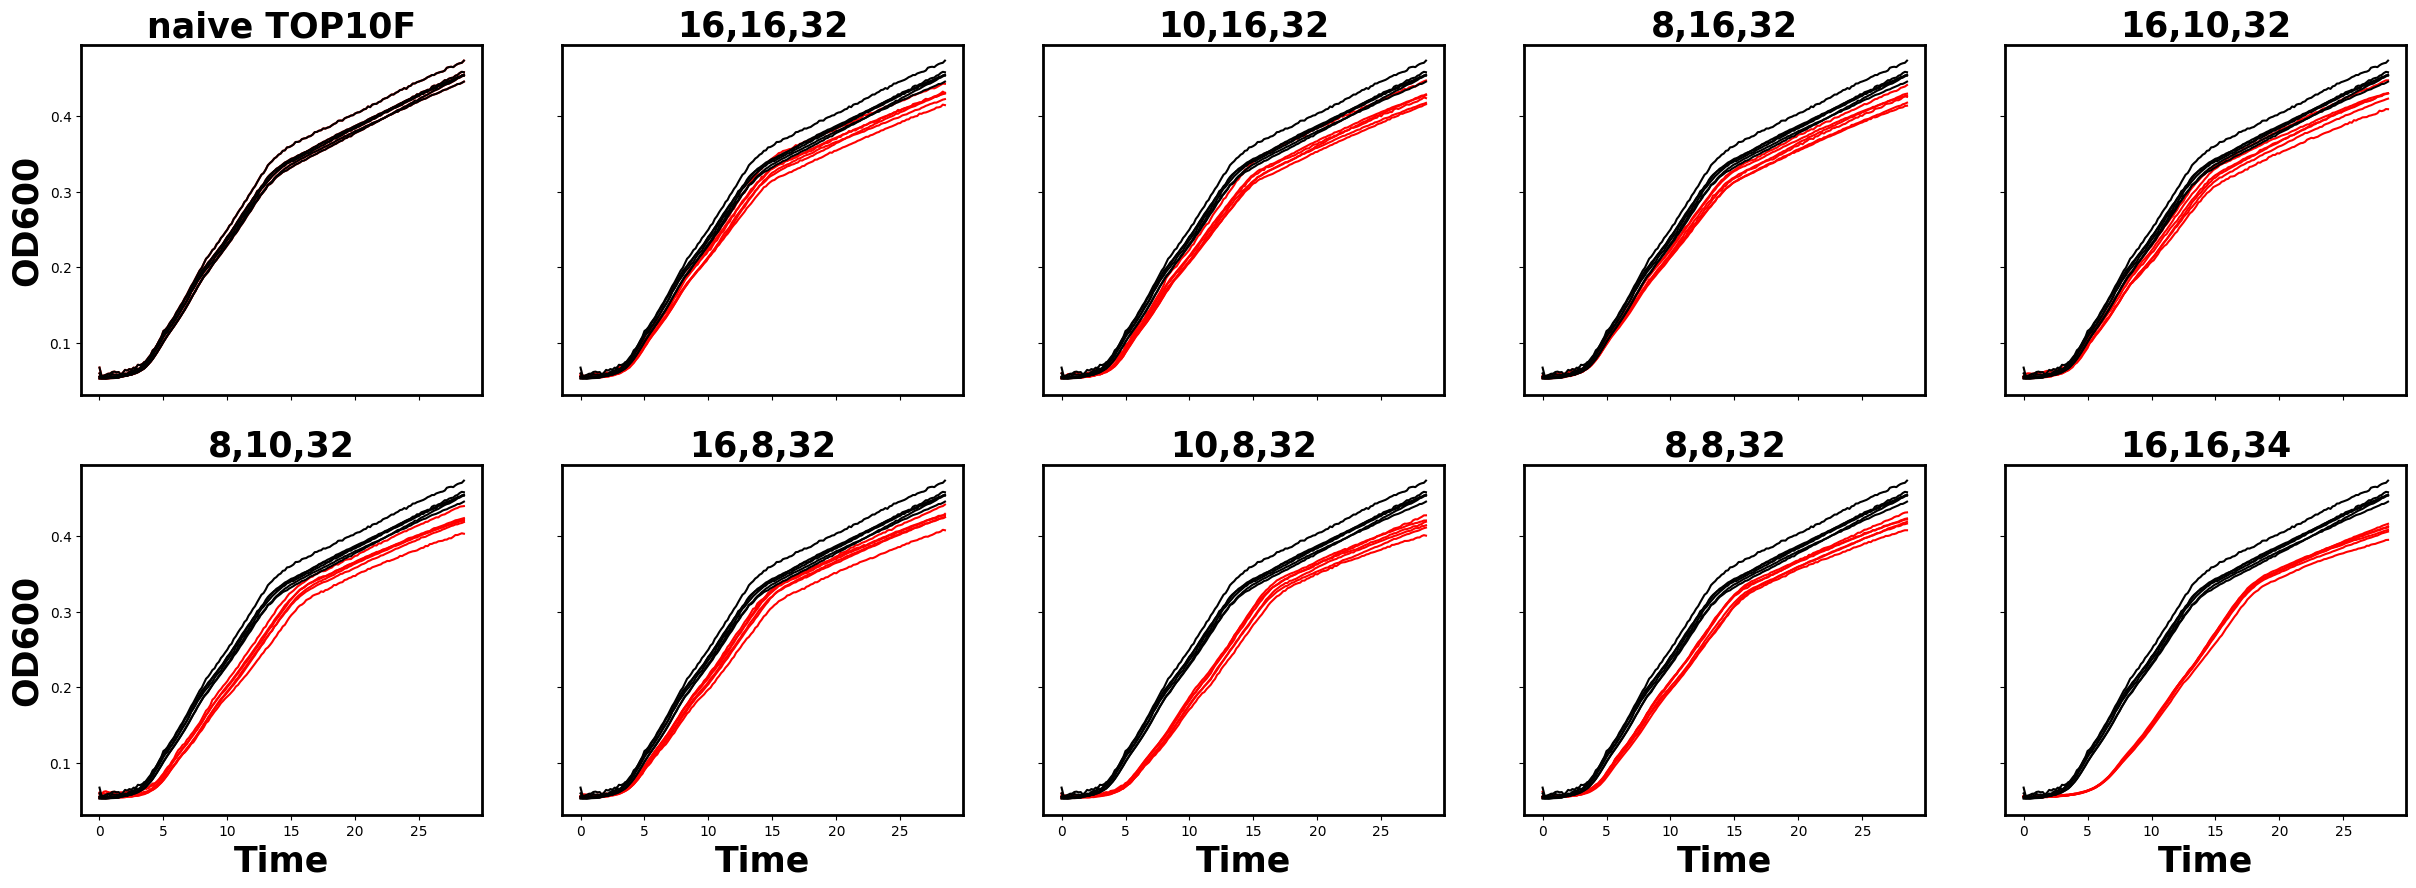

In [5]:
# plot

fig, axes = plt.subplots(2,5, figsize = (30, 10), sharey = True, sharex = True)

df = od_long

for i,st in enumerate( df.strain.unique()):
    sns.lineplot(data = df[(df['strain'] == st)],
                x ='time', y = 'OD600', ax = axes.flatten()[i], units = 'wellID', estimator = None, color = 'red')
    sns.lineplot(data = df[(df['strain'] == 'naive TOP10F')],
                x ='time', y = 'OD600', ax = axes.flatten()[i], units = 'wellID', estimator = None, color = 'black')
    
    axes.flatten()[i].set_title(st, fontsize = 25, fontweight = 'bold')
    axes.flatten()[i].set_ylabel('OD600', fontsize = 25, fontweight = 'bold')
    axes.flatten()[i].set_xlabel('Time', fontsize = 25, fontweight = 'bold')

    for axis in ['top','bottom','left','right']:
        axes.flatten()[i].spines[axis].set_linewidth(2)
  
plt.show()
